In [20]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics

In [4]:
df = pd.read_csv("C:\\Users\\hanna\\Documents\\GitHub\\CSE6242_Project\\CODE\\data\\cleaned_movies_NEW.csv")
df = df.drop_duplicates()

In [5]:
df.columns

Index(['budget', 'homepage', 'movie_id', 'original_language', 'original_title',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'tagline', 'title', 'vote_average', 'vote_count',
       'release_year', 'release_month', 'day_of_week_release', 'has_homepage',
       'num_spoken_languages', 'num_production_companies', 'num_genres',
       'genre_Horror', 'genre_War', 'genre_Adventure', 'genre_Western',
       'genre_Comedy', 'genre_Mystery', 'genre_Romance',
       'genre_Science_Fiction', 'genre_Action', 'genre_Thriller',
       'genre_Crime', 'genre_TV_Movie', 'genre_Animation', 'genre_Foreign',
       'genre_Fantasy', 'genre_Drama', 'genre_Documentary', 'genre_Family',
       'genre_Music', 'genre_History', 'keywords_list',
       'production_companies_list', 'production_countries_list', 'cast_size',
       'cast_member_list', 'cast_1', 'cast_2', 'cast_3', 'cast_4', 'cast_5',
       'cpi', 'revenue_adjusted', 'holiday_release', 'cast_1_vote_averag

In [6]:
y = df['revenue_adjusted']
X = df[['budget','runtime',
        'jan_release','feb_release','mar_release','apr_release','may_release',
       'jun_release','jul_release','aug_release','sep_release','oct_release',
       'nov_release','dec_release','sun_release','mon_release','tue_release',
       'wed_release','thur_release','fri_release','sat_release',
        'genre_Horror', 'genre_War',
       'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
       'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
       'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
       'cast_1_movie_count', 'cast_2_vote_average', 'cast_2_movie_count',
       'cast_3_vote_average', 'cast_3_movie_count', 'cast_4_vote_average',
       'cast_4_movie_count', 'cast_5_vote_average', 'cast_5_movie_count',
       'keywords_holiday_celebrate', 'keywords_violence_war_crime',
       'keywords_superhero', 'keywords_creditstinger_3d',
       'keywords_womandirector_independentfilm',
       'keywords_future_robots_aliens',
       'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
       'keywords_animal_nature']]
X = X.fillna(0)

cols = X.columns

# scaler = MinMaxScaler()
# scaler.fit(X)

# X = pd.DataFrame(scaler.transform(X), columns=cols)

scaler = StandardScaler()

scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=cols)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

In [8]:
# X_train.columns

In [9]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [10]:
feat_scores = fs.scores_
srted_feat_scores = sorted(feat_scores, reverse=True)
print(srted_feat_scores)

[1904.8815431823439, 400.45150527866804, 345.4030135944814, 238.13600476744278, 205.41749284411148, 114.14689539910059, 107.32484231368005, 106.48295786000018, 102.86613547672835, 102.3670821018701, 101.03323249682738, 100.75053682514988, 100.4798272127312, 88.35555904862181, 87.43064811455213, 83.8608286962019, 77.28485915580114, 77.06132323823616, 69.21838132111398, 68.71692697755842, 66.28616949991019, 55.39818315406729, 53.828929622621736, 44.658913304950126, 44.27943648778564, 42.6148410842163, 41.817193072482745, 40.814445804907, 28.439241443997638, 26.582930617270833, 24.742093398049676, 23.53474040848898, 22.645437411091127, 19.715850884006528, 18.59333332657687, 17.188699326735062, 16.990253085778587, 16.143995000004228, 15.974348231801653, 12.676832936439835, 12.052732557247898, 10.59721671636629, 8.133417448291192, 7.461559300437588, 6.136633030437151, 4.446570154693348, 4.1937136716523655, 3.4027755835986446, 2.7789328750516047, 2.716854519645767, 2.6307311619954103, 2.2824

<Axes: xlabel='Score', ylabel='Feature'>

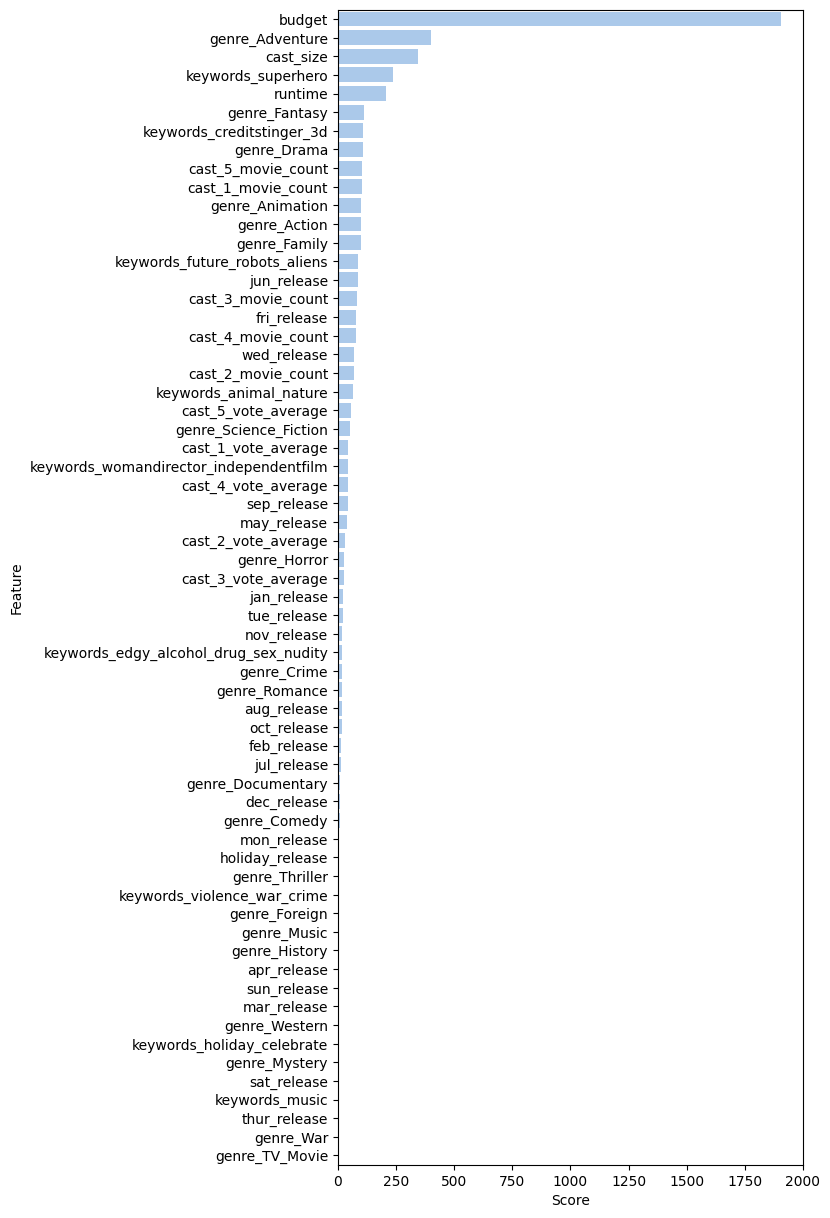

In [11]:
columns = X_train.columns
f_data_lst = []

for s in srted_feat_scores:
    # if s >= 50:
    idx = np.where(feat_scores == s)[0][0]
    f_data_lst.append([columns[idx],s])

feature_data = pd.DataFrame(f_data_lst, columns=['Feature','Score'])

f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Score", y="Feature", data=feature_data,
            label="Score", color="b")

In [41]:
features = ['budget','runtime',
        'jan_release','feb_release','mar_release','apr_release','may_release',
       'jun_release','jul_release','aug_release','sep_release','oct_release',
       'nov_release','dec_release','sun_release','mon_release','tue_release',
       'wed_release','thur_release','fri_release','sat_release',
        'genre_Horror', 'genre_War',
       'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
       'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
       'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
       'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
       'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release',
       'cast_1_vote_average', 'cast_2_vote_average', 'cast_3_vote_average', 'cast_4_vote_average', 'cast_5_vote_average',
       'keywords_holiday_celebrate', 'keywords_violence_war_crime',
       'keywords_superhero', 'keywords_creditstinger_3d',
       'keywords_womandirector_independentfilm',
       'keywords_future_robots_aliens',
       'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
       'keywords_animal_nature']
X_train = X_train[features]
X_test = X_test[features]

In [42]:
# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 300, stop = 600, num = 10)]
n_estimators = [200, 250, 300]
# Number of features to consider at every split
max_features = ['log2', 'sqrt']
# Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 20, num = 10)]
max_depth = list(range(10,26))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 6, 8, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3, 4, 5]
# Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
            #    'bootstrap': bootstrap
               }

In [43]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [4, 6, 8, 10],
                                        'n_estimators': [200, 250, 300]},
                   random_state=0, verbose=2)

In [17]:
filename = '..\\CODE\\modeling_and_analysis\\saved_models\\random_forest.pkl'
pickle.dump(rf_random, open(filename, 'wb'))

In [18]:
predictions = rf_random.predict(X_test)
rf_random.score(X_test, y_test)

0.42000896169122626

In [22]:
r2 = metrics.r2_score(y_test,predictions)
mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

print('R2: ', str(r2))
print('mae: ', str(mae))
print('mse: ', str(mse))
print('rmse: ', str(rmse))

R2:  0.42000896169122626
mae:  128807665.41726169
mse:  6.98651069072836e+16
rmse:  264320084.19203335


In [40]:
# score_table = pd.DataFrame(columns=['R2','MAE','MSE','RMSE'])
score_table = [['R2',r2],['MAE',mae],['MSE',mse],['RMSE',rmse]]
score_table = pd.DataFrame(score_table, columns=['Metric','Value'])
score_table.to_csv("..\\modeling_and_analysis\\performance\\scores\\random_forest.csv", header=True, index=False)
score_table

,Metric,Value
0,R2,4.200090e-01
1,MAE,1.288077e+08
2,MSE,6.986511e+16
3,RMSE,2.643201e+08


In [19]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 17}

In [118]:
# rf = RandomForestRegressor(n_estimators=200, random_state=0, min_samples_split=8, min_samples_leaf=3, max_depth=11, max_features='sqrt')
# rf.fit(X_train, y_train)
# predictions = rf.predict(X_test)
# rf.score(X_test, y_test)

0.41208691581423507

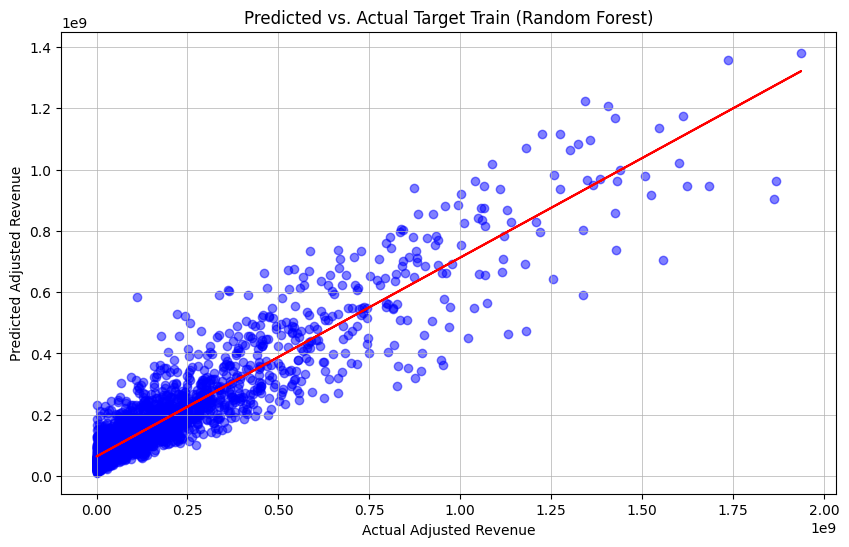

In [138]:
y_train_pred = rf_random.predict(X_train)

fig = plt.figure(figsize=(10,6))

plt.scatter(y_train, y_train_pred, alpha=0.5, color='blue')

m, b = np.polyfit(y_train, y_train_pred, 1)

plt.plot(y_train, m*y_train + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Train (Random Forest)')
plt.grid(linewidth=0.5)

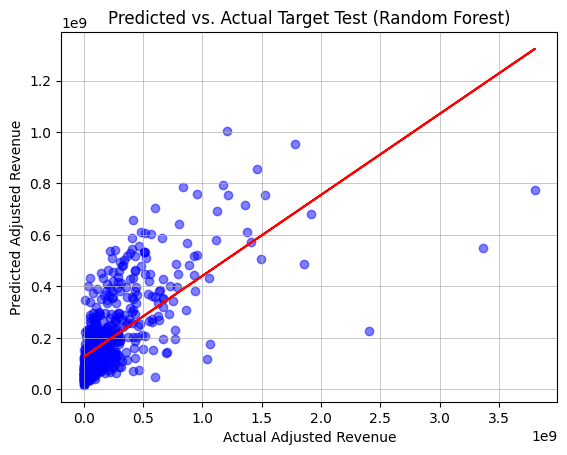

In [128]:
y_test_pred = rf_random.predict(X_test)

plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue')

m, b = np.polyfit(y_test, y_test_pred, 1)

plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Test (Random Forest)')
plt.grid(linewidth=0.5)